<a href="https://colab.research.google.com/github/m-soro/web_scraping_101_flatiron/blob/main/web_scraping_101_flatiron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import requests # to query html
from bs4 import BeautifulSoup # to traverse html

import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})

In [74]:
url = 'http://quotes.toscrape.com'
response = requests.get(url)
response

<Response [200]>

In [75]:
# <Response [200]> --> means a valid URL

In [76]:
response.text

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Quotes to Scrape</title>\n    <link rel="stylesheet" href="/static/bootstrap.min.css">\n    <link rel="stylesheet" href="/static/main.css">\n</head>\n<body>\n    <div class="container">\n        <div class="row header-box">\n            <div class="col-md-8">\n                <h1>\n                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>\n                </h1>\n            </div>\n            <div class="col-md-4">\n                <p>\n                \n                    <a href="/login">Login</a>\n                \n                </p>\n            </div>\n        </div>\n    \n\n<div class="row">\n    <div class="col-md-8">\n\n    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">\n        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>\n        <sp

In [79]:
html = response.text
html[:50] # first 50 chars

'<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta cha'

In [71]:
soup = BeautifulSoup(html, 'lxml')

In [80]:
# kinda like pretty print for html!
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="t

In [8]:
# find all div(s) with a class of quote, using `.find()` will return the first instance
quote_divs = soup.find_all('div',{'class': 'quote'})

In [81]:
quote_divs

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>,
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
 <span>by <small class="author" itempr

In [82]:
# there are total of 10
len(quote_divs)

10

In [83]:
type(quote_divs)

bs4.element.ResultSet

In [84]:
# Let's look at the first quote
first_quote = quote_divs[0]
first_quote

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>

In [85]:
# text of first quote
first_quote.text

'\n“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”\nby Albert Einstein\n(about)\n\n\n            Tags:\n            \nchange\ndeep-thoughts\nthinking\nworld\n\n'

In [87]:
# clean version of first quote
text = first_quote.find('span', {'class': 'text'})
text = text.text
text

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

In [15]:
# get the author
author = first_quote.find('small', {'class': 'author'})
author_name = author.text
author_name

'Albert Einstein'

In [88]:
# get the link of the bio of author
author_link = author.findNextSibling().attrs.get('href')
author_link

'/author/Albert-Einstein'

In [89]:
 # concatenate the base url and the author link
 author_link = url + author_link
 author_link

'http://quotes.toscrape.com/author/Albert-Einstein'

In [90]:
# get the tag
tag_container = first_quote.find('div', {'class':'tags'})
tag_links = tag_container.find_all('a')
tag_links

[<a class="tag" href="/tag/change/page/1/">change</a>,
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>,
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>,
 <a class="tag" href="/tag/world/page/1/">world</a>]

In [93]:
# look at the tag link `change` is in between html tag
tag_links[0]

<a class="tag" href="/tag/change/page/1/">change</a>

In [91]:
# isolate the tag
tag_links[0].text

'change'

In [21]:
# use a for loop to get all the tags from the link
tags = []
for tag in tag_links:
  tags.append(tag.text)

tags  

['change', 'deep-thoughts', 'thinking', 'world']

In [98]:
# list comp version
taglist = [tag.text for tag in tag_links]
taglist

['change', 'deep-thoughts', 'thinking', 'world']

In [97]:
print('text: ', text)
print('author_name: ', author_name)
print('author_link: ', author_link)
print('tags: ', tags)

text:  “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
author_name:  Albert Einstein
author_link:  http://quotes.toscrape.com/author/Albert-Einstein
tags:  ['change', 'deep-thoughts', 'thinking', 'world']


In [103]:
# Now create a scraper function from the above snip of code

def quote_scraper(quote_div):
    # collect the quote
    text = quote_div.find('span', {'class': 'text'})
    text = text.text

    # collect author name
    author = quote_div.find('small', {'class': 'author'})
    author_name = author.text
  
    # collect author link
    author_link = author.findNextSibling().attrs.get('href')
    author_link = url + author_link

    # collect tags
    tag_container = quote_div.find('div', {'class': 'tags'})

    tag_links = tag_container.find_all('a')

    tags = []
    for tag in tag_links:
        tags.append(tag.text)

    # return data as a dictionary
    return {'author': author_name,
            'text': text,
            'author_link': author_link,
            'tags': tags}


In [ ]:
# here are the quote divs
quote_divs

In [104]:
# try the fuction with quote_div #7
quote_scraper(quote_divs[7])

{'author': 'Thomas A. Edison',
 'author_link': 'http://quotes.toscrape.com/author/Thomas-A-Edison',
 'tags': ['edison', 'failure', 'inspirational', 'paraphrased'],
 'text': "“I have not failed. I've just found 10,000 ways that won't work.”"}

In [105]:
# get the author 
quote_scraper(quote_divs[7])['author']

'Thomas A. Edison'

In [108]:
# get all the quotes on page one
page_one_data = []
for each_div in quote_divs:
  data_from_div = quote_scraper(each_div)
  page_one_data.append(data_from_div)

print('number of quotes scraped: ', len(page_one_data) )

number of quotes scraped:  10


In [114]:
# same code as above, re worked as one line with `map()` function
page_one_with_map = list(map(quote_scraper,quote_divs))

print('number of quotes scraped: ', len(page_one_with_map) )

number of quotes scraped:  10


In [116]:
page_one_with_map

[{'author': 'Albert Einstein',
  'author_link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world'],
  'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'},
 {'author': 'J.K. Rowling',
  'author_link': 'http://quotes.toscrape.com/author/J-K-Rowling',
  'tags': ['abilities', 'choices'],
  'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”'},
 {'author': 'Albert Einstein',
  'author_link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles'],
  'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”'},
 {'author': 'Jane Austen',
  'author_link': 'http://quotes.toscrape.com/author/Jane-Austen',
  'tags': ['aliteracy', 'books', 'classic', 'humor'],
  'text': '“The p

In [117]:
def scrape_page(quote_divs):
  data = []
  for div in quote_divs:
    div_data = quote_scraper(div)
    data.append(div_data)
  return data  

In [143]:
# same as above reworked as one line
scrape_page_listcomp = [quote_scraper(div) for div in quote_divs]
scrape_page_listcomp[:3]

[{'author': 'Albert Einstein',
  'author_link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world'],
  'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'},
 {'author': 'J.K. Rowling',
  'author_link': 'http://quotes.toscrape.com/author/J-K-Rowling',
  'tags': ['abilities', 'choices'],
  'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”'},
 {'author': 'Albert Einstein',
  'author_link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles'],
  'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”'}]

In [144]:
data = scrape_page(quote_divs)
data[:3]

[{'author': 'Albert Einstein',
  'author_link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'tags': ['change', 'deep-thoughts', 'thinking', 'world'],
  'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'},
 {'author': 'J.K. Rowling',
  'author_link': 'http://quotes.toscrape.com/author/J-K-Rowling',
  'tags': ['abilities', 'choices'],
  'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”'},
 {'author': 'Albert Einstein',
  'author_link': 'http://quotes.toscrape.com/author/Albert-Einstein',
  'tags': ['inspirational', 'life', 'live', 'miracle', 'miracles'],
  'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”'}]

In [135]:
# define our variables
base_url = 'http://quotes.toscrape.com'
response = requests.get(base_url)
html = response.text
soup = BeautifulSoup(html, 'lxml')
quote_divs = soup.find_all('div', {'class': 'quote'})

In [138]:
# find the next button using the pager class(use the web inspector to view tags)
pager = soup.find('ul', {'class': 'pager'})
pager

<ul class="pager">
<li class="next">
<a href="/page/2/">Next <span aria-hidden="true">→</span></a>
</li>
</ul>

In [139]:
# if there is pager class, find a list element with class of next
# and thats the next page
if pager: 
  next_page = pager.find('li', {'class': 'next'})

In [140]:
# if there is next page, find `a` tag, which is child of list class next
# then extract the `href` 
if next_page:
  next_page = next_page.findChild('a').attrs.get('href')

In [141]:
# build the next page url
next_page = base_url + next_page
next_page

'http://quotes.toscrape.com/page/2/'

In [145]:
# assemble all the above code to a function
def scrape_quotes(url):
  base_url = 'https://quotes.toscrape.com'
  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'lxml')
  quote_divs = soup.find_all('div', {'class': 'quote'})
  data = scrape_page(quote_divs) # the function to scrape a page of quotes

  pager = soup.find('ul', {'class': 'pager'})
  
  if pager:
    next_page = pager.find('li', {'class': 'next'})

    if next_page:
        next_page = next_page.findChild('a').attrs.get('href')

        next_page = base_url + next_page
        print('Scraping', next_page)

        # this is where recursion happens, calling the function inside the function
        data += scrape_quotes(next_page)

  return data        

In [146]:
# scrape whole page
data = scrape_quotes(url)
print(len(data), 'Quotes scraped')

Scraping https://quotes.toscrape.com/page/2/
Scraping https://quotes.toscrape.com/page/3/
Scraping https://quotes.toscrape.com/page/4/
Scraping https://quotes.toscrape.com/page/5/
Scraping https://quotes.toscrape.com/page/6/
Scraping https://quotes.toscrape.com/page/7/
Scraping https://quotes.toscrape.com/page/8/
Scraping https://quotes.toscrape.com/page/9/
Scraping https://quotes.toscrape.com/page/10/
100 Quotes scraped


In [147]:
# random code -- ignore me
!ls

drive  quotes_data.csv	sample_data


In [148]:
# random code -- ignore me
import sys
import os

sys.path.append('../../..')

In [ ]:
# random code -- ignore me
import scraper

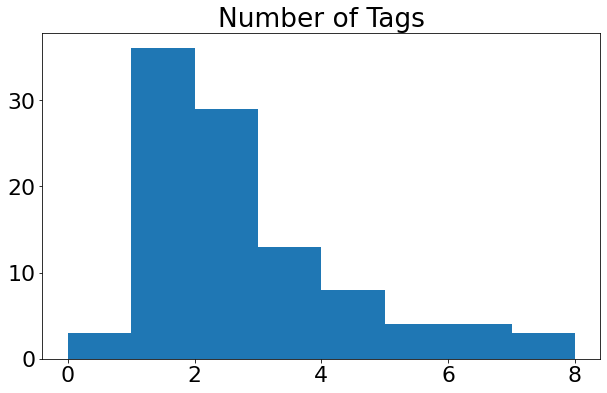

In [150]:
# visualizations

def count_tags(quote):
  return len(quote['tags'])

def tag_lengths(data):
  lengths = []
  for quote in data:
    lengths.append(count_tags(quote))
  return lengths

lengths = tag_lengths(data)
plt.figure(figsize=(10,6))
plt.hist(lengths, bins=8)
plt.title('Number of Tags');    

In [50]:
# export the data to pandas
df = pd.DataFrame(data)
df.head()

,author,text,author_link,tags
0,Albert Einstein,“The world as we have created it is a process ...,http://quotes.toscrape.com/author/Albert-Einstein,"[change, deep-thoughts, thinking, world]"
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...",http://quotes.toscrape.com/author/J-K-Rowling,"[abilities, choices]"
2,Albert Einstein,“There are only two ways to live your life. On...,http://quotes.toscrape.com/author/Albert-Einstein,"[inspirational, life, live, miracle, miracles]"
3,Jane Austen,"“The person, be it gentleman or lady, who has ...",http://quotes.toscrape.com/author/Jane-Austen,"[aliteracy, books, classic, humor]"
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...",http://quotes.toscrape.com/author/Marilyn-Monroe,"[be-yourself, inspirational]"


In [51]:
# export the dataframe to csv
df.to_csv('quotes_data.csv')